<div class="alert alert-block alert-info">
    <h1>BIOS 4150/BIOL 6150</h1>
    <h3>Instructor: Dr. King Jordan</h3>
    <p>TAs: Shivam Sharma (shivamsharma13@gatech.edu) & Vishva Natarajan (vishvanata@gatech.edu)</p>
</div>

<div class="alert alert-block alert-warning">
    <h2>Project 4 (Ploygenic Risk Scores) starter notebook</h2>
    <h3>Deadline: 11:59PM, November 15th, 2023</h3>
</div>

<div class="alert alert-block alert-danger">
    <h2>Alert!</h2>
    <p>Do not delete any comments or information boxes the starter notebook comes with</p>
</div>

---

# **1. Knowing your data**
### *Total Questions: 6*
### *Total Points: 5+5+10+10+20+30 = 80*


---

<div class="alert alert-block alert-warning">
    <h3>1.1 Your Phenotype and Population of interest</h3>
    <p>You will find this in the announcement section of your group</p>
</div>

<div class="alert alert-block alert-success">
    <h3>Response 1.1</h3> 
    <p>Our disease of interest is: <strong>Breast Cancer</strong> and our population of interest is: <strong>East Asians (EAS)</strong> </p>
</div>

<div class="alert alert-block alert-warning">
    <h3>1.2 Check source VCF file</h3>
    <p>Show that you can access these VCF files. Show the first 10 variant IDs from chromosome 15.</p>
</div>

In [1]:
#For this project, you will use VCF file from phase 3 1000Genomes.
!ls -lh /storage/ice-shared/biol6150/Data/1000GenomesAll/ | head

total 15G
-rw-r--r-- 1 ssharma454 gtperson 742M Aug  4  2021 phase3.chr10.GRCh38.GT.crossmap.vcf.gz
-rw-r--r-- 1 ssharma454 gtperson 123K Aug  4  2021 phase3.chr10.GRCh38.GT.crossmap.vcf.gz.tbi
-rw-r--r-- 1 ssharma454 gtperson 736M Aug  4  2021 phase3.chr11.GRCh38.GT.crossmap.vcf.gz
-rw-r--r-- 1 ssharma454 gtperson 123K Aug  4  2021 phase3.chr11.GRCh38.GT.crossmap.vcf.gz.tbi
-rw-r--r-- 1 ssharma454 gtperson 711M Aug  4  2021 phase3.chr12.GRCh38.GT.crossmap.vcf.gz
-rw-r--r-- 1 ssharma454 gtperson 123K Aug  4  2021 phase3.chr12.GRCh38.GT.crossmap.vcf.gz.tbi
-rw-r--r-- 1 ssharma454 gtperson 534M Aug  4  2021 phase3.chr13.GRCh38.GT.crossmap.vcf.gz
-rw-r--r-- 1 ssharma454 gtperson  91K Aug  4  2021 phase3.chr13.GRCh38.GT.crossmap.vcf.gz.tbi
-rw-r--r-- 1 ssharma454 gtperson 482M Aug  4  2021 phase3.chr14.GRCh38.GT.crossmap.vcf.gz


In [2]:
#Show the first 10 variant IDs from chromosome 15. Your bash command goes here.
!zcat /storage/ice-shared/biol6150/Data/1000GenomesAll/phase3.chr15.GRCh38.GT.crossmap.vcf.gz | grep -v "#" | awk '{print $3}' | head -n 10

rs371549847
rs565090028
rs201219124
rs373298708
rs560310552
rs552896638
rs542841371
rs561207761
rs531597354
rs61997842
awk: cmd. line:1: (FILENAME=- FNR=689) fatal: print to "standard output" failed (Broken pipe)
grep: write error

gzip: stdout: Broken pipe


<div class="alert alert-block alert-warning">
    <h3>1.3 How many samples are present in these set of VCF files</h3>
    <p>You can do this using a series of bash commands, or a tool of your choice. But you have to show how you got the total number. You don't have to run this on all VCF files. Just one will work.</p>
</div>

#### Using bcftools

In [3]:
#Get the samples present in the VCF file.
!zcat /storage/ice-shared/biol6150/Data/1000GenomesAll/phase3.chr15.GRCh38.GT.crossmap.vcf.gz | bcftools query -l | wc -l


gzip: stdout: Broken pipe
2504


#### Using bash commands to cross-check

In [5]:
#count number of samlples excluding the column headers like CHROM, POS, ID, REF, ATL etc.
!zcat /storage/ice-shared/biol6150/Data/1000GenomesAll/phase3.chr15.GRCh38.GT.crossmap.vcf.gz | grep '#CHR' |  tr "\t" "\n" | awk 'NR>9{print $0}' | wc -l

2504


<div class="alert alert-block alert-warning">
    <h3>1.4 How many variants are present in chromosome 12 VCF file</h3>
    <p>Use a tools or a bash command. Up to you.</p>
</div>

#### Using bash commands

In [4]:
#Your command for getting the number of variants here.
!zcat /storage/ice-shared/biol6150/Data/1000GenomesAll/phase3.chr12.GRCh38.GT.crossmap.vcf.gz | grep -v "#" | wc -l

3885458


#### Using bcftools

In [3]:
!bcftools view -H /storage/ice-shared/biol6150/Data/1000GenomesAll/phase3.chr12.GRCh38.GT.crossmap.vcf.gz --threads 32 | wc -l


3885458


<div class="alert alert-block alert-warning">
    <h3>1.5 Indexing VCF files</h3>
    <p><b>1.5.1</b> Do the VCF files have a matched tabix file in the shared directory?</p>
    <p><b>1.5.2</b> Using tabix, write the number of variants that lie between genomic positions 15,000,000-15,500,500 on chromosome 22?</p>
</div>

In [1]:
#Your answers here for 1.5.1.
!for file in $(ls /storage/ice-shared/biol6150/Data/1000GenomesAll/*.vcf.gz); do if [[ -e $file.tbi ]]; then echo "$file has matching index file $file.tbi"; else echo "$file has no matching index file"; fi; done

/storage/ice-shared/biol6150/Data/1000GenomesAll/phase3.chr10.GRCh38.GT.crossmap.vcf.gz has matching index file /storage/ice-shared/biol6150/Data/1000GenomesAll/phase3.chr10.GRCh38.GT.crossmap.vcf.gz.tbi
/storage/ice-shared/biol6150/Data/1000GenomesAll/phase3.chr11.GRCh38.GT.crossmap.vcf.gz has matching index file /storage/ice-shared/biol6150/Data/1000GenomesAll/phase3.chr11.GRCh38.GT.crossmap.vcf.gz.tbi
/storage/ice-shared/biol6150/Data/1000GenomesAll/phase3.chr12.GRCh38.GT.crossmap.vcf.gz has matching index file /storage/ice-shared/biol6150/Data/1000GenomesAll/phase3.chr12.GRCh38.GT.crossmap.vcf.gz.tbi
/storage/ice-shared/biol6150/Data/1000GenomesAll/phase3.chr13.GRCh38.GT.crossmap.vcf.gz has matching index file /storage/ice-shared/biol6150/Data/1000GenomesAll/phase3.chr13.GRCh38.GT.crossmap.vcf.gz.tbi
/storage/ice-shared/biol6150/Data/1000GenomesAll/phase3.chr14.GRCh38.GT.crossmap.vcf.gz has matching index file /storage/ice-shared/biol6150/Data/1000GenomesAll/phase3.chr14.GRCh38.GT.

In [2]:
#1.5.2: Using tabix, write the number of variants that lie between genomic positions 15,000,000-15,500,500 on chromosome 22
!tabix /storage/ice-shared/biol6150/Data/1000GenomesAll/phase3.chr22.GRCh38.GT.crossmap.vcf.gz chr22:15000000-155000500 | grep -v "#" | wc -l

1105650


<div class="alert alert-block alert-warning">
    <h3>1.6 Extract the samples of interest</h3>
    <p>You have source 1000 genomes files and a continental population of interest.</p>
    <p><b>1.6.1</b> Write the 1000 genomes population that come from the continental population of interest</p>
    <p><b>1.6.2</b> Extract the samples that come from this population. The final output will be a set of 22 VCF GZ files that have a fraction of total samples present in the source VCF file. <b>Show and briefly explain any helper files you have used for this step.</b></p>
    <p><b>1.6.3</b> How many samples are present in your final VCF file?</p>
</div>

In [4]:
#1.6.1

In [11]:
#Write the 3 letter codes of the populations of interest.

> Our continental population of interest is <strong>East Asians (EAS)</strong>, under which there are five sub-populations:
> 1. Beijing Han Chinese (CHB) <br>
2. Southern Han Chinese (CHS) <br>
3. Kinh Vietnamese (KHV) <br>
4. Japanese (JPT) <br>
5. Dai Chinese(CDX) <br>


In [4]:
#create directory
!mkdir -p ~/scratch/project/project4/

In [6]:
#check the headers
!zcat /storage/ice-shared/biol6150/Data/1000GenomesAll/phase3.chr21.GRCh38.GT.crossmap.vcf.gz | grep "#CHR" 

#CHROM	POS	ID	REF	ALT	QUAL	FILTER	INFO	FORMAT	HG00096	HG00097	HG00099	HG00100	HG00101	HG00102	HG00103	HG00105	HG00106	HG00107	HG00108	HG00109	HG00110	HG00111	HG00112	HG00113	HG00114	HG00115	HG00116	HG00117	HG00118	HG00119	HG00120	HG00121	HG00122	HG00123	HG00125	HG00126	HG00127	HG00128	HG00129	HG00130	HG00131	HG00132	HG00133	HG00136	HG00137	HG00138	HG00139	HG00140	HG00141	HG00142	HG00143	HG00145	HG00146	HG00148	HG00149	HG00150	HG00151	HG00154	HG00155	HG00157	HG00158	HG00159	HG00160	HG00171	HG00173	HG00174	HG00176	HG00177	HG00178	HG00179	HG00180	HG00181	HG00182	HG00183	HG00185	HG00186	HG00187	HG00188	HG00189	HG00190	HG00231	HG00232	HG00233	HG00234	HG00235	HG00236	HG00237	HG00238	HG00239	HG00240	HG00242	HG00243	HG00244	HG00245	HG00246	HG00250	HG00251	HG00252	HG00253	HG00254	HG00255	HG00256	HG00257	HG00258	HG00259	HG00260	HG00261	HG00262	HG00263	HG00264	HG00265	HG00266	HG00267	HG00268	HG00269	HG00271	HG00272	HG00273	HG00274	HG00275	HG00276	HG00277	HG00278	HG00280	HG00281	HG00282	HG00284	HG

As we can see from the column headers above, we do not have the population code as the colum header. Instead we have sample name of populations in 1000Genome project. So we are mapping the sample names with the population code by checking the 1000GP website to obtain the individual sample names belonging to East Asian Ancestry - https://www.internationalgenome.org/data-portal/search?q=EAS

In [5]:
!ls -lh ~/scratch/project/project4/igsr*

-rw-r--r-- 1 alal61 gtperson 16K Nov 13 23:18 /home/hice1/alal61/scratch/project/project4/igsr-cdx.tsv.tsv
-rw-r--r-- 1 alal61 gtperson 21K Nov 13 23:18 /home/hice1/alal61/scratch/project/project4/igsr-chb.tsv.tsv
-rw-r--r-- 1 alal61 gtperson 30K Nov 13 23:18 /home/hice1/alal61/scratch/project/project4/igsr-chs.tsv.tsv
-rw-r--r-- 1 alal61 gtperson 18K Nov 13 23:18 /home/hice1/alal61/scratch/project/project4/igsr-jpt.tsv.tsv
-rw-r--r-- 1 alal61 gtperson 19K Nov 13 23:18 /home/hice1/alal61/scratch/project/project4/igsr-khv.tsv.tsv


In [7]:
#check one file
!head ~/scratch/project/project4/igsr-cdx.tsv

Sample name	Sex	Biosample ID	Population code	Population name	Superpopulation code	Superpopulation name	Population elastic ID	Data collections
HG00978	female	SAME124727	CDX	Dai Chinese	EAS	East Asian Ancestry	CDX	1000 Genomes on GRCh38,1000 Genomes 30x on GRCh38,1000 Genomes phase 3 release
HG00864	female	SAME123547	CDX	Dai Chinese	EAS	East Asian Ancestry	CDX	1000 Genomes on GRCh38,1000 Genomes 30x on GRCh38,Human Genome Structural Variation Consortium, Phase 2,1000 Genomes phase 3 release
HG01046	female	SAME123167	CDX	Dai Chinese	EAS	East Asian Ancestry	CDX	1000 Genomes on GRCh38,1000 Genomes 30x on GRCh38,1000 Genomes phase 3 release
HG01798	female	SAME124228	CDX	Dai Chinese	EAS	East Asian Ancestry	CDX	1000 Genomes on GRCh38,1000 Genomes 30x on GRCh38,1000 Genomes phase 3 release
HG01801	female	SAME124305	CDX	Dai Chinese	EAS	East Asian Ancestry	CDX	1000 Genomes on GRCh38,1000 Genomes 30x on GRCh38,1000 Genomes phase 3 release
HG01806	female	SAME124304	CDX	Dai Chinese	EAS	East Asian An

##### 1.6.2 Extract the samples that come from this population

In [8]:
#Extract the sample names(present in 1st column) from all the above 5 files(excluding header lines) and write it into a helper file
!for file in $(ls ~/scratch/project/project4/igsr*); do awk 'NR>1{print $1}' $file >> ~/scratch/project/project4/EAS_sample_names.txt; done

In [10]:
!head ~/scratch/project/project4/EAS_sample_names.txt

HG00978
HG00864
HG01046
HG01798
HG01801
HG01806
HG01813
HG02188
HG02190
HG01817


In the above helper file, named <em>EAS_sample_names.txt</em> we extracted sampleIDs from all 5 sub-populations. We will use this file to subset the 22 vcf files. 

In [9]:
#Verify if all samples are present in the EAS_sample_names.txt
!find ~/scratch/project/project4/ -name 'igsr*.*' | xargs wc -l
!wc -l ~/scratch/project/project4/EAS_sample_names.txt

   110 /home/hice1/alal61/scratch/project/project4/igsr-cdx.tsv
   106 /home/hice1/alal61/scratch/project/project4/igsr-jpt.tsv
   125 /home/hice1/alal61/scratch/project/project4/igsr-khv.tsv
   172 /home/hice1/alal61/scratch/project/project4/igsr-chs.tsv
   113 /home/hice1/alal61/scratch/project/project4/igsr-chb.tsv
   626 total
621 /home/hice1/alal61/scratch/project/project4/EAS_sample_names.txt


<code> 626 - 5(header lines) = 621 </code> <br>
The sample size from 1000GP website also confirms the number of samples are 621

###### Subsetting the required set of 22 VCF GZ files for our population of interest EAS using bcftools

In [3]:
!seq 22 | xargs -I {} -P 22 -n 1 bash -c "bcftools view -Oz -S ~/scratch/project/project4/EAS_sample_names.txt --force-samples /storage/ice-shared/biol6150/Data/1000GenomesAll/phase3.chr{}.GRCh38.GT.crossmap.vcf.gz > ~/scratch/project/project4/EAS_chr{}.vcf.gz --threads 32"


Warn: subset called for sample that does not exist in header: "HG02169"... skipping
Warn: subset called for sample that does not exist in header: "HG02176"... skipping
Warn: subset called for sample that does not exist in header: "HG02358"... skipping
Warn: subset called for sample that does not exist in header: "HG02372"... skipping
Warn: subset called for sample that does not exist in header: "HG02168"... skipping
Warn: subset called for sample that does not exist in header: "HG02170"... skipping
Warn: subset called for sample that does not exist in header: "HG02377"... skipping
Warn: subset called for sample that does not exist in header: "HG02405"... skipping
Warn: subset called for sample that does not exist in header: "HG00983"... skipping
Warn: subset called for sample that does not exist in header: "HG00866"... skipping
Warn: subset called for sample that does not exist in header: "HG02189"... skipping
Warn: subset called for sample that does not exist in header: "HG02381"... s

##### 1.6.3 How many samples are present in your final VCF file?

In [6]:
#Extract the total number of samples present in your final VCF file
!find ~/scratch/project/project4/ -name 'EAS_chr*.vcf.gz' | xargs -I {} bash -c "bcftools query -l {} | wc -l"

504
504
504
504
504
504
504
504
504
504
504
504
504
504
504
504
504
504
504
504
504
504


As we see from the output of bcftools view command, there were some sample IDs which were skipped since they were not present in the vcf files. So, even though EAS had 621 samples, the VCF file contains only 504 samples across all 5 sub-populations.

In [7]:
# The total samples present in the set of 22 vcf files
!find ~/scratch/project/project4/ -name 'EAS_chr*.vcf.gz' | xargs -I {} bash -c "bcftools query -l {} | wc -l" | awk '{s+=$1} END {print s}'


11088


# **2. Annotating variants**
### *Total Questions: 2*
### *Total Points: 20+20+60 = 100*


---

<div class="alert alert-block alert-warning">
    <h3>2.1 Find clinically important genes</h3>
    <p>Different genes perform different functions in our body. Is there a way we can find clincically important genes for humans? Search on web and find a resource that can tell you which genes are clinically important (there can be multiple answers)</p>
</div>

In [14]:
#What was the resource that you identified? Give a 1-3 line description and the web link.

> 1. <strong>ClinVar</strong> is a valuable resource for finding information about the clinical significance of genetic variants, including details about human genes. It provides a freely accessible archive of reports on the relationships between human variations and phenotypes. Link: https://www.ncbi.nlm.nih.gov/clinvar/
2. Another resource for finding clinically important genes is the <strong>Online Mendelian Inheritance in Man (OMIM)</strong> database. OMIM is a comprehensive compendium of human genes and genetic phenotypes, and it includes information on the clinical significance of genes, associated disorders, and related phenotypic information. Link: https://www.ncbi.nlm.nih.gov/omim

<div class="alert alert-block alert-warning">
    <h3>2.2 Varints in those genes</h3>
    <p><b>2.2.1</b> For your population, can you identify a set of genes (3-8 genes; not a lot) that might be clinically relevant? If not, then try finding clincially important genes for all humans and use them.</p>
    <p><b>2.2.2</b> In any one of the genes identified above, can you find a variant (dbSNP ID) which has a HIGH or MODERATE variant effect consequence? <i>Hint:</i> https://useast.ensembl.org/info/genome/variation/prediction/predicted_data.html</p>
</div>

In [15]:
#You answers here.

#### 2.2.1

> <em>8 genes important for the east asians are</em>:
> 1. GJB2 (Gap Junction Beta-2)
2. HLA-DQB1 (Human Leukocyte Antigen - DQB1)
3. EGFR (Epidermal Growth Factor Receptor)
4. CFTR (Cystic Fibrosis Transmembrane Conductance Regulator)
5. ALDH2 (Aldehyde Dehydrogenase 2 Family Member)
6. TPMT (Thiopurine S-Methyltransferase)
7. HLA-B (Human Luekocyte Antigen - B)
8. HMBS (Hydromethylbilane Synthase)

#### 2.2.2

For the <strong>GJB2</strong> gene, we found a variant with dbSNP ID: <strong>rs72474224</strong> that is a <em>missense variant</em> with <strong>MODERATE</strong> effect consequence.
https://www.ncbi.nlm.nih.gov/snp/rs72474224

<div class="alert alert-block alert-warning">
    <h3>2.3 Select a gene</h3>
    <p><b>2.3.1 </b>Select a clinically relevant gene from the list in <i>2.2.1</i> and create a new VCF file which:</p> 
    <p>1. Has all the samples from your continental population of interest</p>
    <p>2. Has only the variants which exist on the gene of interest</p>
    <p><b>Note:</b> If you end up with no variants, then try another gene. It is important that you find some variants before you move forward.
        <hr>
    <p><b>2.3.2 </b>How many individuals in the VCF file (subset of your continental population) carry a variant with a HIGH or MODERATE consequence (let's use ensembl consequence definitions for this question; as used above). Print their 1000 genomes ID.</p>
</div>

In [1]:
#Show your commands and results here. Add more cells as required.

2.3.1 <br> Gene selected: <strong>GJB2</strong> that is present on <strong>chromosome 13</strong> <br> 
Co-ordinates: 20187470 - 20192938<br> 
https://www.ncbi.nlm.nih.gov/gene/2706 

The following command extracts variants from the specified region (encompassing the GJB2 gene) on chromosome 13 (containing variants only from East Asians) and outputs the result to a new file (EAS_GJB2.vcf.gz). 

In [7]:
#create VCF file for GJB2 gene
!bcftools view -r chr13:20187470-20192938 -Oz -o ~/scratch/project/project4/EAS_GJB2.vcf.gz ~/scratch/project/project4/EAS_chr13.vcf.gz

In [8]:
#check the VCF file contents
!zcat ~/scratch/project/project4/EAS_GJB2.vcf.gz | tail

chr13	20192530	rs7332397	G	A	100	PASS	AC=0;AF=0.00499201;AN=1008;NS=2504;DP=8717;EAS_AF=0;AMR_AF=0;AFR_AF=0.0182;EUR_AF=0;SAS_AF=0.001;AA=G|||;VT=SNP	GT	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0

In [7]:
#grepping for variant with MODERATE effect consequence (as identified above)
!zgrep "rs72474224" ~/scratch/project/project4/EAS_GJB2.vcf.gz

chr13	20189473	rs72474224	C	T	100	PASS	AC=74;AF=0.0153754;AN=1008;NS=2504;DP=21986;EAS_AF=0.0734;AMR_AF=0.0029;AFR_AF=0.0008;EUR_AF=0;SAS_AF=0;AA=C|||;VT=SNP;EX_TARGET	GT	0|0	0|0	0|0	0|0	0|0	0|0	1|0	0|0	0|1	0|0	0|0	0|0	0|0	1|1	0|0	0|0	0|0	0|0	0|1	0|0	1|1	0|0	0|0	0|0	0|0	0|1	0|1	0|0	0|1	0|0	0|1	0|0	0|1	0|0	0|1	0|0	0|0	0|0	1|0	1|0	0|0	1|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|1	0|1	0|0	0|0	0|1	0|0	0|0	0|0	0|0	1|0	0|0	0|0	0|0	0|0	0|1	0|0	0|0	0|0	1|0	0|1	0|0	1|1	0|0	0|0	0|1	0|0	0|0	0|0	0|1	0|0	0|0	0|0	0|1	0|1	0|0	0|1	0|1	0|0	0|0	1|0	0|0	0|0	1|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|1	0|0	0|0	1|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	1|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|1	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	1|0	0|0	0|0	1|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|1	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|1	0|0	0|0	0

In [47]:
#count the number of samples in the gene VCF file
!bcftools query -l ~/scratch/project/project4/EAS_GJB2.vcf.gz | wc -l

504


The EAS VCF file had 504 samples and even after filtering for GJB2 gene, we retained all 504 samples.

##### 2.3.2 To find how many individuals in the VCF file (subset of our continental population) carry a variant with a HIGH or MODERATE consequence, we need to first annotate our  EAS_GJB2.vcf.gz file.

In [60]:
!snpEff -Xmx16g ann -v GRCh38.105 ~/scratch/project/project4/EAS_GJB2.vcf.gz  > ~/scratch/project/project4/EAS_GJB2.Annotated.vcf


00:00:00 SnpEff version SnpEff 5.1d (build 2022-04-19 15:49), by Pablo Cingolani
00:00:00 Command: 'ann'
00:00:00 Reading configuration file 'snpEff.config'. Genome: 'GRCh38.105'
00:00:00 Reading config file: /home/hice1/alal61/notebooks/Projects/snpEff.config
00:00:00 Reading config file: /storage/ice-shared/biol6150/SharedEnvironment/biol6150/share/snpeff-5.1-2/snpEff.config
00:00:00 done
00:00:00 Reading database for genome version 'GRCh38.105' from file '/storage/ice-shared/biol6150/SharedEnvironment/biol6150/share/snpeff-5.1-2/./data/GRCh38.105/snpEffectPredictor.bin' (this might take a while)
00:00:20 done
00:00:21 Loading Motifs and PWMs
00:00:21 Building interval forest
00:00:25 done.
00:00:25 Genome stats :
#-----------------------------------------------
# Genome name                : 'Homo_sapiens'
# Genome version             : 'GRCh38.105'
# Genome ID                  : 'GRCh38.105[0]'
# Has protein coding info    : true
# Has Tr. Support Level info : true
# Genes         

In [48]:
#Check annotations
!cat ~/scratch/project/project4/EAS_GJB2.Annotated.vcf | grep -v "#" | head -20

chr13	20187532	rs180788420	T	C	100.0	PASS	AC=0;AF=0.000199681;AN=1008;NS=2504;DP=14173;EAS_AF=0;AMR_AF=0;AFR_AF=0;EUR_AF=0.001;SAS_AF=0;AA=T|||;VT=SNP;ANN=C|3_prime_UTR_variant|MODIFIER|GJB2|ENSG00000165474|transcript|ENST00000382848.5|protein_coding|2/2|c.*1369A>G|||||1369|,C|3_prime_UTR_variant|MODIFIER|GJB2|ENSG00000165474|transcript|ENST00000382844.2|protein_coding|1/1|c.*1369A>G|||||1369|	GT	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	0|0	

Next, we create TSV file to filter chromosome, position, rsID, reference and alternate allele and annotation to be used for finding total number of variants with HIGH or MODERATE effect consequence

In [62]:
!cat ~/scratch/project/project4/EAS_GJB2.Annotated.vcf | grep -v "##" | cut -f1-5,8 > ~/scratch/project/project4/EAS_GJB2.Annotated.tsv

In [59]:
#check the contents of the tsv file created
!head ~/scratch/project/project4/EAS_GJB2.Annotated.tsv

#CHROM	POS	ID	REF	ALT	INFO
chr13	20187532	rs180788420	T	C	AC=0;AF=0.000199681;AN=1008;NS=2504;DP=14173;EAS_AF=0;AMR_AF=0;AFR_AF=0;EUR_AF=0.001;SAS_AF=0;AA=T|||;VT=SNP;ANN=C|3_prime_UTR_variant|MODIFIER|GJB2|ENSG00000165474|transcript|ENST00000382848.5|protein_coding|2/2|c.*1369A>G|||||1369|,C|3_prime_UTR_variant|MODIFIER|GJB2|ENSG00000165474|transcript|ENST00000382844.2|protein_coding|1/1|c.*1369A>G|||||1369|
chr13	20187624	rs7988691	A	G	AC=1008;AF=0.997204;AN=1008;NS=2504;DP=15922;EAS_AF=1;AMR_AF=1;AFR_AF=0.9894;EUR_AF=1;SAS_AF=1;AA=G|||;VT=SNP;ANN=G|3_prime_UTR_variant|MODIFIER|GJB2|ENSG00000165474|transcript|ENST00000382848.5|protein_coding|2/2|c.*1277T>C|||||1277|,G|3_prime_UTR_variant|MODIFIER|GJB2|ENSG00000165474|transcript|ENST00000382844.2|protein_coding|1/1|c.*1277T>C|||||1277|
chr13	20187704	rs11841182	A	T	AC=0;AF=0.0403355;AN=1008;NS=2504;DP=15391;EAS_AF=0;AMR_AF=0.013;AFR_AF=0.1452;EUR_AF=0.001;SAS_AF=0;AA=A|||;VT=SNP;ANN=T|3_prime_UTR_variant|MODIFIER|GJB2|ENSG00000165474|

In [51]:
#Read the annotations file
with open("/home/hice1/alal61/scratch/project/project4/EAS_GJB2.Annotated.tsv", "r") as file:
    file_text = file.read()
annotation_rows = [i.split("\t") for i in file_text.split("\n") if i != ""]
len(annotation_rows)

184

In [52]:
#count the number of HIGH or MODERATE variants
count=0
variants = ""
for i in annotation_rows:
    
    if "HIGH" in i[5] or "MODERATE" in i[5]:
        count +=1
        variants += f"{i[2]}\n"
        #print(i)

with open("/home/hice1/alal61/scratch/project/project4/EAS_HM_variants.txt", "w") as f:
    f.write(variants[:-1])
    
print("Total number of high or moderate variants:",count)

Total number of high or moderate variants: 41


##### We found that there are 41 variants that have MODERATE or HIGH effect consequence. Now we need to extract the associated SAMPLE ID to find the number of individuals in the VCF file that carry that variant.  

In [2]:
#file manipulation to add header line to file listing high or moderate variants to use it for grepping in next step
!sed -i '1s/^/#CHROM\n/' ~/scratch/project/project4/EAS_HM_variants.txt

In [3]:
#grep for header and rsIDs in the file
!grep -F -f ~/scratch/project/project4/EAS_HM_variants.txt ~/scratch/project/project4/EAS_GJB2.Annotated.vcf > ~/scratch/project/project4/EAS_GJB2_ANNFILTERED.vcf

In [4]:
#check the number of lines in the file
!cat ~/scratch/project/project4/EAS_GJB2_ANNFILTERED.vcf | wc -l

42


The count here is 42 because we have added a header in the file.

In [45]:
#to print the sample names for each high or moderate variants
vcf_dict = {}
vcf_filtered_dict = {}
line_list = []
with open( "/home/hice1/alal61/scratch/project/project4/EAS_GJB2_ANNFILTERED.vcf", "r") as file: 
    for line in file:
        line = line.strip().split()
        line_list.append(line)
        
    for i in range(1, len(line_list)):
        for j in range(len(line_list[0])):
            vcf_dict[line_list[0][j]] = line_list[i][j]
            vcf_filtered_dict = {key:value for key,value in vcf_dict.items() if value == "0|1" or value == "1|0" or value == "1|1"}
        print(f'{vcf_dict["ID"]}\n--------------')
        print(*list(vcf_filtered_dict), sep = "\n")
        print(f'Number of samples identified: {len(list(vcf_filtered_dict))}\n=============================================')
        print()

rs76838169
--------------
HG00864
HG02190
HG01797
HG01805
HG02151
HG02182
HG00851
HG01804
HG01816
HG02410
HG02382
NA18612
NA18636
NA18611
NA18628
NA18642
NA18536
NA18552
NA18641
NA18599
NA18602
HG00409
HG00581
HG00656
HG00620
HG00448
HG00614
HG00626
HG00464
HG00729
HG00671
HG00589
HG00705
HG00451
HG00689
HG00704
HG00728
NA18983
NA18988
NA19060
NA18944
NA19067
NA19081
NA18999
NA19080
NA18943
HG01842
HG02122
HG01872
HG02058
Number of samples identified: 50

rs570552952
--------------

Number of samples identified: 0

rs397516878
--------------
NA18625
Number of samples identified: 1

rs568612627
--------------

Number of samples identified: 0

rs201004645
--------------

Number of samples identified: 0

rs200104362
--------------

Number of samples identified: 0

rs111033360
--------------

Number of samples identified: 0

rs376898963
--------------

Number of samples identified: 0

rs80338949
--------------

Number of samples identified: 0

rs34988750
--------------

Number of samples i

# **3. PGS catalog**
### *Total Questions: 1*
### *Total Points: 20*


---

<div class="alert alert-block alert-warning">
    <h3>3.1 Select a PGS summary stat file</h3>
    <p>Go to PGS Catalog and find a summary statistics that is relevant to the continental population of interest and the disease assigned to you.</p>
    <p><b>3.1.1</b> Talk about why you selected this PGS file. (1-3 lines)</p>
    <p><b>3.1.2</b> Write the PGP and PGS website links for the files selected.</p>
    <p><b>3.1.3</b> Can you find the train and test sizes used in the publication? What was the distribtion (by continental ancestry; eg: European, African, EastAsian, etc.) for the samples used in training?</p>
</div>

In [6]:
#All answers go here. 1-3 lines in general for each.

> 3.1.1 We searched for our disease of interest on the website https://www.pgscatalog.org/ . We specified the results for our population of interest i.e. East Asians. We selected the summary statistics (https://www.pgscatalog.org/score/PGS003758/) beacuse it is a recent study with good number of variants but the most important fact was that the Source of Variant Associations and the population used for Score Development/Training and PGS Evaluation is 100% East Asians.

> 3.1.2 <br><strong>PGP website:</strong> https://www.pgscatalog.org/publication/PGP000478 <br>
<strong>PGS website:</strong> https://www.pgscatalog.org/score/PGS003758/

> 3.1.3 <br><strong>Train size</strong>: 2254 <br> <strong>Test Size</strong>: 8001. <br>The distribution for the samples used in training is <strong>100% East Asians</strong>.

# **4. Polygenic risk scores**
### *Total Questions: 3*
### *Total Points: 30+40+30 = 100*


---

<div class="alert alert-block alert-warning">
    <h3>4.1 Harmonize the variant IDs between your VCF file and the PGS summary stat file</h3>
    <p>Variants are identified in a variety of ways (dbSNP) being one of them. It's a good idea to have one single VCF file and a single summary stat file.<b>Hint:</b> This might be a good time to convert your VCF files to a Plink2 format (makes things easier and faster)</p>
    <hr>
    <p><b>Question:</b> Write the % of variants present in the summary stat that are also present in your VCF file? Mention <b>total n</b> and <b>overlapping n.</b></p>
</div>

In [2]:
#Put all the code and comments here.

In [14]:
#Creating a merged VCF file for all 22chrs
!ls ~/scratch/project/project4/EAS_chr[0-9]*.vcf.gz | xargs -P 22 bcftools concat -o ~/scratch/project/project4/EAS_merged_output.vcf.gz -Oz --threads 32


Checking the headers and starting positions of 21 files
Concatenating /home/hice1/alal61/scratch/project/project4/EAS_chr10.vcf.gz	8.599384 seconds
Concatenating /home/hice1/alal61/scratch/project/project4/EAS_chr12.vcf.gz	8.288946 seconds
Concatenating /home/hice1/alal61/scratch/project/project4/EAS_chr13.vcf.gz	5.894247 seconds
Concatenating /home/hice1/alal61/scratch/project/project4/EAS_chr14.vcf.gz	5.518175 seconds
Concatenating /home/hice1/alal61/scratch/project/project4/EAS_chr15.vcf.gz	5.101786 seconds
Concatenating /home/hice1/alal61/scratch/project/project4/EAS_chr16.vcf.gz	5.644453 seconds
Concatenating /home/hice1/alal61/scratch/project/project4/EAS_chr17.vcf.gz	4.756406 seconds
Concatenating /home/hice1/alal61/scratch/project/project4/EAS_chr18.vcf.gz	4.976878 seconds
Concatenating /home/hice1/alal61/scratch/project/project4/EAS_chr19.vcf.gz	3.791946 seconds
Concatenating /home/hice1/alal61/scratch/project/project4/EAS_chr1.vcf.gz	13.543899 seconds
Concatenating /home/hice

In [49]:
#create files in plink format from the merged VCF file
!plink2 --vcf ~/scratch/project/project4/EAS_merged_output_new.vcf.gz --make-pgen --out ~/scratch/project/project4/EAS_chrpos_plink

PLINK v2.00a5LM 64-bit Intel (23 Sep 2023)     www.cog-genomics.org/plink/2.0/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/hice1/alal61/scratch/project/project4/EAS_chrpos_plink.log.
Options in effect:
  --make-pgen
  --out /home/hice1/alal61/scratch/project/project4/EAS_chrpos_plink
  --vcf /home/hice1/alal61/scratch/project/project4/EAS_merged_output_new.vcf.gz

Start time: Fri Nov 17 16:57:07 2023
191894 MiB RAM detected, ~186286 available; reserving 95947 MiB for main
workspace.
Using up to 16 threads (change this with --threads).
--vcf: 77507403 variants scanned.
--vcf: 77462k variants converted.
/home/hice1/alal61/scratch/project/project4/EAS_chrpos_plink-temporary.pgen +
/home/hice1/alal61/scratch/project/project4/EAS_chrpos_plink-temporary.pvar.zst
+ /home/hice1/alal61/scratch/project/project4/EAS_chrpos_plink-temporary.psam
written.
504 samples (0 females, 0 males, 504 ambiguous; 504 founders) loaded from
/home/hice1/alal61/s

In [21]:
#download harmonized summary stats file from PGSCatalog website
!wget https://ftp.ebi.ac.uk/pub/databases/spot/pgs/scores/PGS003758/ScoringFiles/Harmonized/PGS003758_hmPOS_GRCh38.txt.gz -P ~/scratch/project/project4/

--2023-11-15 17:00:18--  https://ftp.ebi.ac.uk/pub/databases/spot/pgs/scores/PGS003758/ScoringFiles/Harmonized/PGS003758_hmPOS_GRCh38.txt.gz
Resolving ftp.ebi.ac.uk (ftp.ebi.ac.uk)... 193.62.193.165
Connecting to ftp.ebi.ac.uk (ftp.ebi.ac.uk)|193.62.193.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 910854 (890K) [application/x-gzip]
Saving to: ‘/home/hice1/alal61/scratch/project/project4/PGS003758_hmPOS_GRCh38.txt.gz’

PGS003758_hmPOS_GRC 100%[===================>] 889.51K   580KB/s    in 1.5s    

2023-11-15 17:00:20 (580 KB/s) - ‘/home/hice1/alal61/scratch/project/project4/PGS003758_hmPOS_GRCh38.txt.gz’ saved [910854/910854]



In [ ]:
#unzip the summary stats file
!gunzip ~/scratch/project/project4/PGS003758_hmPOS_GRCh38.txt.gz

In [28]:
#Extract required fields from the summary stat file
!cat ~/scratch/project/project4/PGS003758_hmPOS_GRCh38.txt | grep -v "#" | awk 'NR>1{ print $1"\:"$2"\t"$3"\t"$5  }' >  ~/scratch/project/project4/PGS003758_hmPOS_GRCh38.forPlink.txt

awk: cmd. line:1: warning: escape sequence `\:' treated as plain `:'


In [29]:
#Check the file created.
!cat ~/scratch/project/project4/PGS003758_hmPOS_GRCh38.forPlink.txt | head

1:761752	T	0.0656542262581812
1:892648	T	-0.310655273518118
1:943968	T	0.0608422322012917
1:984947	A	-0.393970211784165
1:1025299	T	-0.360924210032064
1:1027846	C	-0.0599354463777111
1:1121358	C	0.0601228307125484
1:1141618	A	0.218466747553811
1:1153073	A	0.578905290673735
1:1367036	A	0.0702189389965827
cat: write error: Broken pipe


In [74]:
#Our VCF file had chr1 but the summary stats file had only number for chromosome. So we are adding 'chr' to the first field of the file
!sed -r 's/^([0-9]+:)/chr\1/g' ~/scratch/project/project4/PGS003758_hmPOS_GRCh38.forPlink.txt > ~/scratch/project/project4/PGS003758_hmPOS_GRCh38_modified.forPlink.txt
!tail -30 ~/scratch/project/project4/PGS003758_hmPOS_GRCh38_modified.forPlink.txt

chr22:50274225	T	-0.123987100724198
chr22:50464655	A	-0.167198150911678
chr22:50465324	T	-0.0566003491921479
chr22:50481807	G	-0.0442456492696915
chr22:50491372	A	-0.236363055147571
chr22:50501630	T	-0.069440347872038
chr22:50590724	A	0.492802837139221
chr22:50593893	C	-0.585174511002554
chr22:50600819	T	-0.0569962065341396
chr22:50613093	T	-0.0759177423178943
chr22:50624257	T	-0.139430597227581
chr22:50653013	T	2.21779290630795
chr22:50670151	A	-0.142174089424436
chr22:50671333	T	0.159905923268866
chr22:50682351	T	-0.154343553616024
chr22:50695908	T	-0.0916572729101589
chr22:50697119	T	-0.0457208312083569
chr22:50710349	A	0.0553974895174555
chr22:50725498	A	0.380374320163002
chr22:50730972	G	0.0910453549035724
chr22:50735366	C	-0.214810754560783
chr22:50776446	T	-0.109545810481819
chr22:50808470	G	0.0492557042937512
chr22:50873599	A	0.864827696029746
chr22:50876156	C	-0.267918165319167
chr22:50876903	A	-0.218245217539642
chr22:51034177	A	-0.114659901834912
chr22:51034249	G	-0.20843950

In [46]:
#modifying the VCF file to add a third column with chr:pos
#we had to do this since we did not have rsIDs in our summary stats file and we joined stats file and VCF file based on chr:pos
!zcat ~/scratch/project/project4/EAS_merged_output.vcf.gz | awk 'BEGIN{OFS="\t"} /^#/ {print; next} {$3 = $1":"$2; print}' | bgzip > ~/scratch/project/project4/EAS_merged_output_new.vcf.gz
!zcat ~/scratch/project/project4/EAS_merged_output_new.vcf.gz | grep -v "##" | head -n5 | cut -f1-15

#CHROM	POS	ID	REF	ALT	QUAL	FILTER	INFO	FORMAT	HG00978	HG00864	HG01046	HG01798	HG01801	HG01806
chr10	14554	chr10:14554	A	G	100	PASS	AC=0;AF=0.00539137;AN=1008;NS=2504;DP=18344;EAS_AF=0;AMR_AF=0.0029;AFR_AF=0.0189;EUR_AF=0;SAS_AF=0;AA=.|||;VT=SNP	GT	0|0	0|0	0|0	0|0	0|0	0|0
grep: chr10	14583	chr10:14583	T	G	100	PASS	AC=0;AF=0.0181709;AN=1008;NS=2504;DP=18006;EAS_AF=0;AMR_AF=0.0043;AFR_AF=0.0651;EUR_AF=0.002;SAS_AF=0;AA=.|||;VT=SNP	GT	0|0	0|0	0|0	0|0	0|0	0|0
write error
chr10	14667	chr10:14667	G	A	100	PASS	AC=0;AF=0.000199681;AN=1008;NS=2504;DP=16954;EAS_AF=0;AMR_AF=0;AFR_AF=0;EUR_AF=0;SAS_AF=0.001;AA=.|||;VT=SNP	GT	0|0	0|0	0|0	0|0	0|0	0|0
chr10	14744	chr10:14744	A	C	100	PASS	AC=1;AF=0.0123802;AN=1008;NS=2504;DP=16364;EAS_AF=0.001;AMR_AF=0.0231;AFR_AF=0.0038;EUR_AF=0.0308;SAS_AF=0.0092;AA=.|||;VT=SNP	GT	0|0	0|0	0|0	0|0	0|0	0|0

gzip: stdout: Broken pipe


##### Total number of the variants present in the summary stat that are also present in the VCF file

In [54]:
#extract chr:pos from the merged VCF file to find overlapping variants
!zcat ~/scratch/project/project4/EAS_merged_output_new.vcf.gz | grep -v "#" | awk '{print $3}' > ~/scratch/project/project4/chr_pos.txt

In [55]:
#check the file
!head ~/scratch/project/project4/chr_pos.txt

chr10:14554
chr10:14583
chr10:14667
chr10:14744
chr10:14783
chr10:14813
chr10:14829
chr10:14863
chr10:14942
chr10:14969


In [58]:
#grepping for overlapping variants in the summary stats file
!grep -F -f ~/scratch/project/project4/chr_pos.txt ~/scratch/project/project4/PGS003758_hmPOS_GRCh38_modified.forPlink.txt > ~/scratch/project/project4/overlapping_variants.txt

In [61]:
#count the number of overlapping variants
!cat ~/scratch/project/project4/overlapping_variants.txt | wc -l

4997


##### % of variants present in the summary stat that are also present in the VCF file

In [62]:
#finding total number of variants present
!bcftools view -H ~/scratch/project/project4/EAS_merged_output_new.vcf.gz --threads 32 | wc -l

77507403


Percentage of variants present in the summary stat file that are also present in the VCF file = (overlapping variants/total number of variants) * 100 = (4997 / 77507403) * 100 = <strong>0.0064%</strong>

#Show that the variant IDs are also overlapping.

We don't have rsID in PGS summary stats file, so we used chromosome and position to find the overlapping variants which is shown below -

In [63]:
!head ~/scratch/project/project4/overlapping_variants.txt

chr1:1367036	A	0.0702189389965827
chr1:2185972	A	0.18343384418392
chr1:3496945	A	-0.0553624995415398
chr1:3597017	A	-0.12338384515499
chr1:4459764	A	-0.0656041289524377
chr1:4694257	G	-0.0487055907769556
chr1:4901737	A	0.0587729913164943
chr1:5220054	C	0.0473149042446757
chr1:5290988	C	-0.925143831256981
chr1:5533060	G	0.39487472073769


<div class="alert alert-block alert-warning">
    <h3>4.2 Calculate polygenic risk scores</h3>
    <p>Calculate the polygenic risk scores (for the disease of interest) for all the individuals belonging to the continental population of interest</p>
</div>

In [3]:
###All the work here.

In [51]:
#use plink to calculate PRS scores for breat cancer in EAS
!plink2 --pfile ~/scratch/project/project4/EAS_chrpos_plink --rm-dup exclude-all --score ~/scratch/project/project4/PGS003758_hmPOS_GRCh38_modified.forPlink.txt 1 2 3 --out ~/scratch/project/project4/PGS003758.PRS --threads 32

PLINK v2.00a5LM 64-bit Intel (23 Sep 2023)     www.cog-genomics.org/plink/2.0/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/hice1/alal61/scratch/project/project4/PGS003758.PRS.log.
Options in effect:
  --out /home/hice1/alal61/scratch/project/project4/PGS003758.PRS
  --pfile /home/hice1/alal61/scratch/project/project4/EAS_chrpos_plink
  --rm-dup exclude-all
  --score /home/hice1/alal61/scratch/project/project4/PGS003758_hmPOS_GRCh38_modified.forPlink.txt 1 2 3
  --threads 32

Start time: Fri Nov 17 17:07:01 2023
191894 MiB RAM detected, ~184250 available; reserving 95947 MiB for main
workspace.
Using up to 32 threads (change this with --threads).
504 samples (0 females, 0 males, 504 ambiguous; 504 founders) loaded from
/home/hice1/alal61/scratch/project/project4/EAS_chrpos_plink.psam.
77507403 variants loaded from
/home/hice1/alal61/scratch/project/project4/EAS_chrpos_plink.pvar.
Note: No phenotype data present.
--rm-dup: 454531 duplic

In [ ]:
#Show the scores file in the end.

In [53]:
#PRS Score file
!head ~/scratch/project/project4/PGS003758.PRS.sscore

#IID	ALLELE_CT	NAMED_ALLELE_DOSAGE_SUM	SCORE1_AVG
HG00978	2052	707	0.00793245
HG00864	2052	709	0.00844638
HG01046	2052	706	0.00624852
HG01798	2052	694	0.00721184
HG01801	2052	702	0.00689943
HG01806	2052	700	0.00902284
HG01813	2052	719	0.0110722
HG02188	2052	719	0.00673682
HG02190	2052	711	0.00797002


<div class="alert alert-block alert-warning">
    <h3>4.3 Visualize the scores by populations in the continental populations of interest</h3>
    <p>You might want to scale the scores and use boxplots (or anything else you think that looks good).</p>
</div>

In [64]:
#We are extracting sample IDs and population code from the samples file we downloaded from 1000GP website
!for file in $(ls ~/scratch/project/project4/igsr*); do awk 'NR>1{print $1,$4}' $file >> ~/scratch/project/project4/EAS_sample_names_PC.txt; done

In [65]:
#check the file
!head ~/scratch/project/project4/EAS_sample_names_PC.txt

HG00978 CDX
HG00864 CDX
HG01046 CDX
HG01798 CDX
HG01801 CDX
HG01806 CDX
HG01813 CDX
HG02188 CDX
HG02190 CDX
HG01817 CDX


In [39]:
#joining the files with population code and PRS score file on common column sampleID
!chmod +x ~/scratch/project/project4/PGS003758.PRS.sscore
!join -1 1 -2 1 <(sort ~/scratch/project/project4/EAS_sample_names_PC.txt) <(sort ~/scratch/project/project4/PGS003758.PRS.sscore) > ~/scratch/project/project4/prs_score_boxplot.txt

In [40]:
#check the file
!cat ~/scratch/project/project4/prs_score_boxplot.txt

HG00403 CHS 2052 699 0.00844825
HG00404 CHS 2052 717 0.00814244
HG00406 CHS 2052 724 0.0082301
HG00407 CHS 2052 704 0.00779117
HG00409 CHS 2052 696 0.0096368
HG00410 CHS 2052 717 0.00814787
HG00419 CHS 2052 713 0.0109838
HG00421 CHS 2052 707 0.00851231
HG00422 CHS 2052 717 0.00678911
HG00428 CHS 2052 712 0.00927907
HG00436 CHS 2052 713 0.00672003
HG00437 CHS 2052 722 0.00775949
HG00442 CHS 2052 717 0.0090519
HG00443 CHS 2052 724 0.00945769
HG00445 CHS 2052 726 0.00850686
HG00446 CHS 2052 711 0.00750264
HG00448 CHS 2052 717 0.00703281
HG00449 CHS 2052 695 0.00758693
HG00451 CHS 2052 706 0.00772109
HG00452 CHS 2052 695 0.00871659
HG00457 CHS 2052 698 0.00807151
HG00458 CHS 2052 690 0.00723031
HG00463 CHS 2052 703 0.00673863
HG00464 CHS 2052 717 0.009159
HG00472 CHS 2052 702 0.00741661
HG00473 CHS 2052 712 0.00989017
HG00475 CHS 2052 719 0.00976043
HG00476 CHS 2052 703 0.00840806
HG00478 CHS 2052 709 0.00749356
HG00479 CHS 2052 701 0.00979797
HG00500 CHS 2052 711 0.00702493
HG00513 CHS 20

In [41]:
#add appropriate headers to the joined file
!sed -i '1s/^/SAMPLE_ID\tPOP_CODE\tALLELE_CT\tNAMED_ALLELE_DOSAGE_SUM\tSCORE1_AVG\n/' ~/scratch/project/project4/prs_score_boxplot.txt

In [42]:
#the rows were not tab-separated, so we are adding tabs between elements
!tr " " "\t" < ~/scratch/project/project4/prs_score_boxplot.txt > ~/scratch/project/project4/prs_score_boxplot_tabsep.txt

In [43]:
#verifying if the tabs were added
!cat -A ~/scratch/project/project4/prs_score_boxplot_tabsep.txt

SAMPLE_ID^IPOP_CODE^IALLELE_CT^INAMED_ALLELE_DOSAGE_SUM^ISCORE1_AVG$
HG00403^ICHS^I2052^I699^I0.00844825$
HG00404^ICHS^I2052^I717^I0.00814244$
HG00406^ICHS^I2052^I724^I0.0082301$
HG00407^ICHS^I2052^I704^I0.00779117$
HG00409^ICHS^I2052^I696^I0.0096368$
HG00410^ICHS^I2052^I717^I0.00814787$
HG00419^ICHS^I2052^I713^I0.0109838$
HG00421^ICHS^I2052^I707^I0.00851231$
HG00422^ICHS^I2052^I717^I0.00678911$
HG00428^ICHS^I2052^I712^I0.00927907$
HG00436^ICHS^I2052^I713^I0.00672003$
HG00437^ICHS^I2052^I722^I0.00775949$
HG00442^ICHS^I2052^I717^I0.0090519$
HG00443^ICHS^I2052^I724^I0.00945769$
HG00445^ICHS^I2052^I726^I0.00850686$
HG00446^ICHS^I2052^I711^I0.00750264$
HG00448^ICHS^I2052^I717^I0.00703281$
HG00449^ICHS^I2052^I695^I0.00758693$
HG00451^ICHS^I2052^I706^I0.00772109$
HG00452^ICHS^I2052^I695^I0.00871659$
HG00457^ICHS^I2052^I698^I0.00807151$
HG00458^ICHS^I2052^I690^I0.00723031$
HG00463^ICHS^I2052^I703^I0.00673863$
HG00464^ICHS^I2052^I717^I0.009159$
HG00472^ICHS^I2052^I702^I0.00741661$
HG00473^ICHS

In [8]:
#using Python's matplotlib and seaborn package to visualize PRS scores for our subpopulations of interest
import pandas as pd
from scipy.stats import zscore
import seaborn as sns
from matplotlib.legend_handler import HandlerTuple

In [44]:
#load the file into pandas dataframe
scores = pd.read_csv('/home/hice1/alal61/scratch/project/project4/prs_score_boxplot_tabsep.txt', sep="\t")
scores.head()

,SAMPLE_ID,POP_CODE,ALLELE_CT,NAMED_ALLELE_DOSAGE_SUM,SCORE1_AVG
0,HG00403,CHS,2052,699,0.008448
1,HG00404,CHS,2052,717,0.008142
2,HG00406,CHS,2052,724,0.008230
3,HG00407,CHS,2052,704,0.007791
4,HG00409,CHS,2052,696,0.009637


In [48]:
#scaling the PRS scores using zscore
scores['ScaledPRS'] = zscore(scores['SCORE1_AVG'])
scores.head()

,SAMPLE_ID,POP_CODE,ALLELE_CT,NAMED_ALLELE_DOSAGE_SUM,SCORE1_AVG,ScaledPRS
0,HG00403,CHS,2052,699,0.008448,0.181192
1,HG00404,CHS,2052,717,0.008142,-0.083555
2,HG00406,CHS,2052,724,0.008230,-0.007666
3,HG00407,CHS,2052,704,0.007791,-0.387658
4,HG00409,CHS,2052,696,0.009637,1.210149


/storage/ice-shared/biol6150/SharedEnvironment/biol6150/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/ice-shared/biol6150/SharedEnvironment/biol6150/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/storage/ice-shared/biol6150/SharedEnvironment/biol6150/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


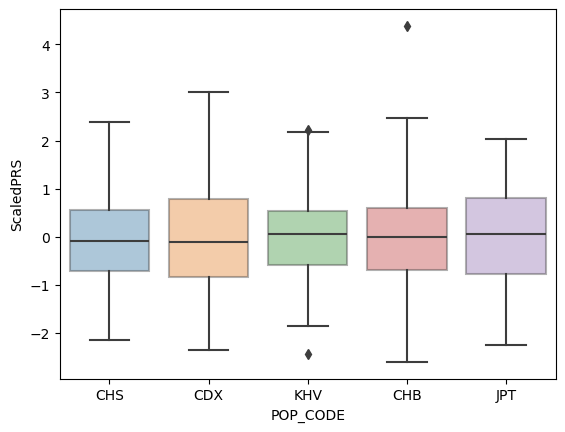

In [50]:
#plot the scaled PRS score vs sub-populations using boxplot
ax = sns.boxplot(data=scores, x="POP_CODE", y="ScaledPRS", boxprops={'alpha': 0.4})